# Movable Emojis

## Imports

In [1]:
from controllable_nca.experiments.movable_emoji.movable_emoji_dataset import MovableEmojiDataset
from controllable_nca.experiments.movable_emoji.trainer import MovableEmojiNCATrainer
from controllable_nca.nca import ControllableNCA
import torch

### Load Dataset

In [2]:
dataset = MovableEmojiDataset(grid_size=64, image_size=32)

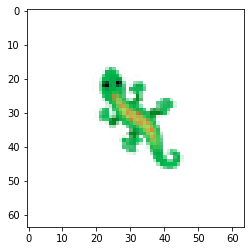

In [3]:
dataset.visualize(32, 32)

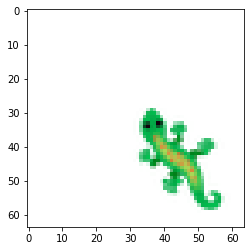

In [4]:
dataset.visualize(48, 48)

### Make NCA

In [5]:
NUM_HIDDEN_CHANNELS = 32

nca =  ControllableNCA(num_goals=dataset.num_goals(), target_shape=dataset.target_size(), living_channel_dim=3, num_hidden_channels=NUM_HIDDEN_CHANNELS, cell_fire_rate=0.5)

In [6]:
device = torch.device('cuda')
nca = nca.to(device)
dataset.to(device)

### Make Trainer

In [12]:
trainer = MovableEmojiNCATrainer(nca, dataset, nca_steps=[48, 64], lr=1e-3, num_damaged=0, damage_radius=3, device=device, pool_size=256)

Writing to tensorboard_logs/2022-02-20 09:25:58.227535


In [13]:
trainer.train(batch_size=18, epochs=100000)

loss:0.02163780853152275--log10loss:-1.6647867265073057--perception_net.weight_g


KeyboardInterrupt: 

## Visualizer

In [9]:
from controllable_nca.experiments.movable_emoji.visualizer import MovableEmojiVisualizer

#### load pretrained nca

In [ ]:
# nca.load("/home/kokkgoblin/Code/controllable-ncas/examples/saved_models/movable_salamander.pt")

In [10]:
viz = MovableEmojiVisualizer(trainer, 64)

In [11]:
viz.visualize()

Canvas(height=320, width=320)